# Assignment 2: Rheology
## **Armengol, Sílvia; Candela, Héctor; Cuesta, Andreu**
## Universitat Politècnica de Catalunya

---
### Assignment A

##### As assignment for this topic, I propose to make a similar study: the laminar flow in a pipe, for a Bingham plastic. 

First of all, we apply the Navier Stokes equation for a laminar and viscous flow, and we make some simplifications. This part will only apply to a specific range of values of the radius, when the flow of the Bingham plastic acts as a liquid.


\begin{equation}
0 =  -\frac{\partial p}{\partial z} + \frac{1}{r}\frac{\partial}{\partial r}\left(r \tau_{rz}\right)
\end{equation}

\begin{equation}
\tau_{rz} = \tau_y + \mu\dot{\gamma}
\end{equation}

\begin{equation}
\tau_{rz} = \tau_y + \mu\frac{\partial u_z}{\partial r}
\end{equation}

\begin{equation}
0 =  -\frac{\partial p}{\partial z} + \frac{1}{r}\frac{\partial}{\partial r}\left(r \tau_y + r\mu\frac{\partial u_z}{\partial r}\right)
\end{equation}

\begin{equation}
\frac{\partial p}{\partial z} = - \frac{\Delta p}{L}
\end{equation}

\begin{equation}
\dfrac{-r\dfrac{\Delta p}{L} - \tau_y}{\mu} = \frac{\partial}{\partial r}\left( r\frac{\partial u_z}{\partial r}\right)
\end{equation}

\begin{equation}
\frac{\partial u_z}{\partial r} = -\frac{r\Delta p}{2L\mu} - \frac{\tau_y}{\mu}
\end{equation}

To obtain the limit value of $r$, from which it will be determined if the flow acts like a solid or liquid, we make equal the last equation to 0 and we operate imposing that $L=1$:

\begin{equation}
\frac{r\Delta p}{2\mu} = \frac{\tau_y}{\mu}
\end{equation}

\begin{equation}
\frac{r\Delta p}{2} = \tau_y
\end{equation}

A dimensionless pressure can be defined as: 
\begin{equation}
p^* = \frac{\Delta p}{\tau_y}
\end{equation}

Introducing $p^*$ to the previous equation we obtain:
\begin{equation}
\frac{rp^*\tau_y}{2} = \tau_y
\end{equation}

\begin{equation}
r = \frac{2}{p^*}
\end{equation}

For $1>r>2/p^*$ the fluid will act as a liquid, so that the velocity will follow the Navier Stokes equation for a laminar and viscous flow.
And for $0<r<2/p^*$ the fluid will act as a solid, having a constant velocity.

The Navier Stokes equation development is the following:

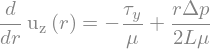

In [1]:
from IPython.display import display, Markdown
import numpy as np
import sympy as sp
sp.init_printing()
mu, Deltap, L, r, R, tau, p_dimless = sp.symbols('\mu, {\Delta}p, L, r, R, tau_y, p^*', positive=True)
uz = sp.Function('u_z')
Eq = sp.Eq(uz(r).diff(r), (1/(2*mu)*(Deltap/L)*r-tau/mu))
display(Eq)

This DOE is solved by integrating both sides of the equation. We also introduce the dimensionless pressure and we impose that $L=1$ and $R=1$ to simplify the result.

In [4]:
exp = -(1/(2*mu)*(Deltap/L)*r-tau/mu)
uz = sp.integrate(exp, (r, r, R)).simplify()
uz = uz.subs(R, 1)
uz = uz.subs(Deltap, p_dimless*tau)
uz = uz.subs(L, 1)
uz.simplify()
display(Markdown(r'$$u_z(r) = '+sp.latex(uz)+'$$'))

$$u_z(r) = \frac{\frac{p^{*} \tau_{y} \left(r^{2} - 1\right)}{4} + \tau_{y} \left(1 - r\right)}{\mu}$$

The next step is to obtain the expression of the flow. In order to obtain the right result, the integration is going to be done by parts. We define the critical value of the radius as the one from which the velocity goes from being constant to follow the previous expression. Therefore, for $0<r<2/p^*$ the fluid acts as a solid and has a constant flow (the product of its velocity and its section). And for $1>r>2/p^*$ the fluid acts as a liquid and the flow is the result of integrating $u_z(r)$.

In [5]:
r_crit = 2/p_dimless
u_crit = uz.subs(r, r_crit)
Q = 2*sp.pi*sp.integrate(uz*r, (r, r_crit, 1)).simplify().powsimp()
Q = Q + sp.pi*r_crit*r_crit*u_crit
Q = Q.simplify()
display(Markdown(r'$$Q = '+sp.latex(Q)+'$$'))

$$Q = \frac{\pi \tau_{y} \left(- 3 \left(p^{*}\right)^{4} + 8 \left(p^{*}\right)^{3} - 16\right)}{24 \mu \left(p^{*}\right)^{3}}$$

Another important value, key for the resolution of the problem, is the average velocity, which is the quotient of $Q$ divided by the section ($\pi·R^2 = \pi$).

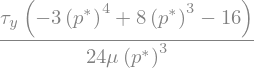

In [6]:
u_avg = Q/(sp.pi)
display(u_avg)

Now, it is simple to obtain the dimensionless velocity; just the quotient of $u_z(r)$ divided by the average velocity.

In [7]:
u_dimless = uz/u_avg
u_dimless = u_dimless.simplify()
display(Markdown(r'$$u^* = '+sp.latex(u_dimless)+'$$'))

$$u^* = \frac{6 \left(p^{*}\right)^{3} \left(- p^{*} \left(r^{2} - 1\right) + 4 r - 4\right)}{3 \left(p^{*}\right)^{4} - 8 \left(p^{*}\right)^{3} + 16}$$

A deeper analysis can be done through its plot, taking into account the different ranges of $r$ and the variation of the relation between the pressure and the yield shear stress ($p^*$).

In [8]:
u_np = sp.lambdify((p_dimless, r), u_dimless)

In [9]:
from ipywidgets import interactive
import matplotlib.pyplot as plt

In [10]:
def f(p_dimless):
    plt.figure(1, frameon=False)
    num = 500
    x = np.linspace(-1, 1, num)
    plt.xlim(-1, 1)
    plt.ylim(0, 3)
    if 2/p_dimless >= 1:
        u = np.zeros(num)
        plt.plot(x, u, linewidth=4)
        plt.plot(x, u_np(10**10, np.abs(x)), '--', label=r'$\tau_r$')
        plt.legend()
        plt.show()
    else:
        r_crit = 2/p_dimless
        xn = np.linspace(-1, -r_crit, num)
        xp = np.linspace(r_crit, 1, num)
        xc = np.linspace(-r_crit, r_crit, num)
        us = u_np(p_dimless, r_crit)
        u = np.linspace(us, us, num)
        plt.plot(xn, u_np(p_dimless, np.abs(xn)), 'c', linewidth=4)
        plt.plot(xp, u_np(p_dimless, np.abs(xp)), 'c', linewidth=4)
        plt.plot(xc, u, linewidth=4)
        plt.plot(x, u_np(10**10, np.abs(x)), '--', label=r'$\tau_r$')
        plt.legend()
        plt.show()
        
interactive_plot = interactive(f, p_dimless=(0.01, 20, 0.01))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=10.0, description='p_dimless', max=20.0, min=0.01, step=0.01), Output(…

In this plot we can see the dimensionless velocity as a function of the radius. We observe that as we expected the fluid has a plug flow in the middle part where the shear stress is lower than the yield stress. On the sides, the fluid has the behavior of a liquid having a gradient of velocity when a shear stress is applied. Moreover, when the dimensionless pressure is lower than 2 the radius where the liquid flow starts is bigger than one, so there is no flow. 

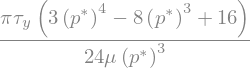

In [10]:
Q.factor(sp.pi*tau/mu)

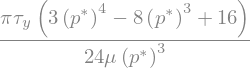

In [12]:
Q.simplify()